In [2]:
#5.3.8 EDA Code-Along: Uber Data
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

In [51]:
data = pd.read_csv('uber-trip-data/uber-raw-data-apr14.csv')
data.tail()

,Date/Time,Lat,Lon,Base
564511,4/30/2014 23:22:00,40.7640,-73.9744,B02764
564512,4/30/2014 23:26:00,40.7629,-73.9672,B02764
564513,4/30/2014 23:31:00,40.7443,-73.9889,B02764
564514,4/30/2014 23:32:00,40.6756,-73.9405,B02764
564515,4/30/2014 23:48:00,40.6880,-73.9608,B02764


In [53]:
#convert one column
data['Date/Time']=data['Date/Time'].map(pd.to_datetime)

In [54]:
def get_dom(dt):
    return dt.day

data['dom'] = data['Date/Time'].map(get_dom)

In [55]:
data.tail()

,Date/Time,Lat,Lon,Base,dom
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,30
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,30
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,30
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,30
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764,30


In [56]:
def get_weekday(dt):
    return dt.weekday()

data['weekday'] = data['Date/Time'].map(get_weekday)

def get_hour(dt):
    return dt.hour

data['hour'] = data['Date/Time'].map(get_hour)

data.tail()

,Date/Time,Lat,Lon,Base,dom,weekday,hour
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,30,2,23
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,30,2,23
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,30,2,23
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,30,2,23
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764,30,2,23


In [49]:
# analyze the DoM

(array([14546., 17474., 20701., 26714., 19521., 13445., 19550., 16188.,
        16843., 20041., 20420., 18170., 12112., 12674., 20641., 17717.,
        20973., 18074., 14602., 11017., 13162., 16975., 20346., 23352.,
        25095., 24925., 14677., 15475., 22835., 36251.]),
 array([ 1.        ,  1.96666667,  2.93333333,  3.9       ,  4.86666667,
         5.83333333,  6.8       ,  7.76666667,  8.73333333,  9.7       ,
        10.66666667, 11.63333333, 12.6       , 13.56666667, 14.53333333,
        15.5       , 16.46666667, 17.43333333, 18.4       , 19.36666667,
        20.33333333, 21.3       , 22.26666667, 23.23333333, 24.2       ,
        25.16666667, 26.13333333, 27.1       , 28.06666667, 29.03333333,
        30.        ]),
 <a list of 30 Patch objects>)

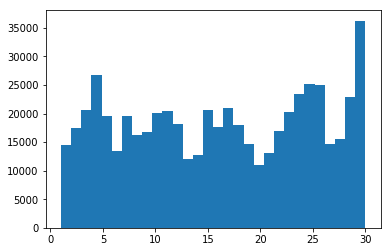

In [57]:
plt.hist(data.dom, bins=30)

Text(0.5, 1.0, 'Frequency by DoM = ubey = Apr 2014')

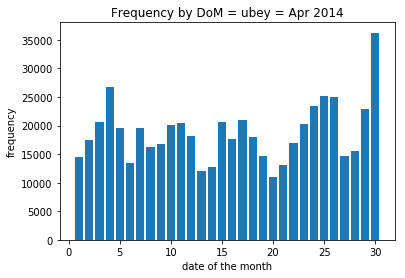

In [59]:
plt.hist(data.dom, bins=30, rwidth =.8, range=(.5,30.5))
plt.xlabel('date of the month')
plt.ylabel('frequency')
plt.title('Frequency by DoM = ubey = Apr 2014')

In [61]:
# data.groupby('doe') will group same day as one. So month 
# April should be 30 groups

def count_row(rows):
    return len(rows)

by_date = data.groupby('dom').apply(count_row)
by_date

dom
1     14546
2     17474
3     20701
4     26714
5     19521
6     13445
7     19550
8     16188
9     16843
10    20041
11    20420
12    18170
13    12112
14    12674
15    20641
16    17717
17    20973
18    18074
19    14602
20    11017
21    13162
22    16975
23    20346
24    23352
25    25095
26    24925
27    14677
28    15475
29    22835
30    36251
dtype: int64

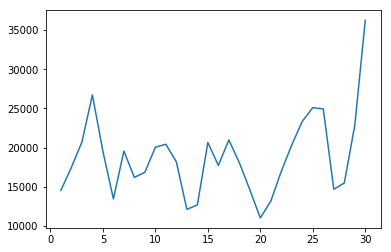

In [63]:
plt.plot(by_date)

<BarContainer object of 30 artists>

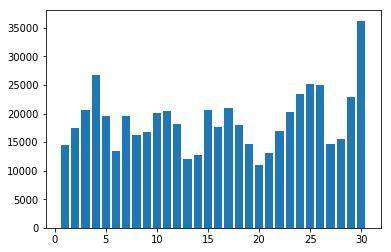

In [19]:
plt.bar(range(1,31), by_date)


In [64]:
by_date_sorted = by_date.sort_values()
by_date_sorted.head()

dom
20    11017
13    12112
14    12674
21    13162
6     13445
dtype: int64

' #use ; can remove data type print out'

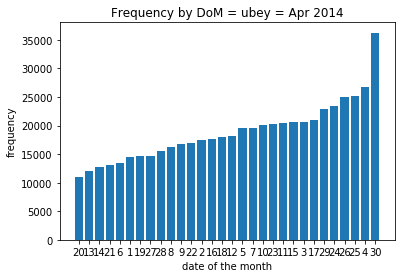

In [29]:
plt.bar(range(1,31), by_date_sorted)
plt.xticks(range(1,31), by_date_sorted.index)
plt.xlabel('date of the month')
plt.ylabel('frequency')
plt.title('Frequency by DoM = ubey = Apr 2014')
;  #use ; can remove data type print out

In [65]:
#Analyze hour

(array([ 7769.,  4935.,  5040.,  6095.,  9476., 18498., 24924., 22843.,
        17939., 17865., 18774., 19425., 22603., 27190., 35324., 42003.,
        45475., 43003., 38923., 36244., 36964., 30645., 20649.,     0.]),
 array([ 0.5       ,  1.47916667,  2.45833333,  3.4375    ,  4.41666667,
         5.39583333,  6.375     ,  7.35416667,  8.33333333,  9.3125    ,
        10.29166667, 11.27083333, 12.25      , 13.22916667, 14.20833333,
        15.1875    , 16.16666667, 17.14583333, 18.125     , 19.10416667,
        20.08333333, 21.0625    , 22.04166667, 23.02083333, 24.        ]),
 <a list of 24 Patch objects>)

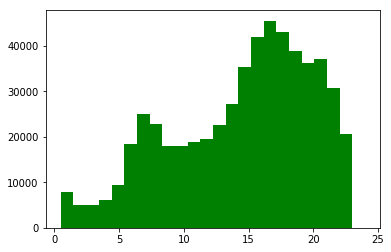

In [66]:
plt.hist(data.hour, bins=24, range=(.5,24), color='green')


([<matplotlib.axis.XTick at 0x7f64d5431320>,
 <a list of 7 Text xticklabel objects>)

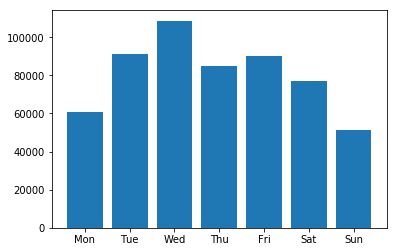

In [68]:
#analyze the weekday
plt.hist(data.weekday, bins=7,range=(-.5, 6.5), rwidth=.8)
plt.xticks(range(7), 'Mon Tue Wed Thu Fri Sat Sun'.split())

In [69]:
#Cross analyze

''

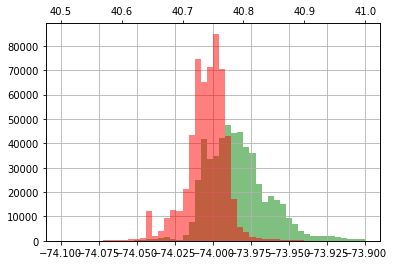

In [70]:
plt.hist(data['Lon'], bins=50, range=(-74.1,-73.9), color='g',alpha=.5, label='longitude')
plt.grid()
plt.twiny()
plt.hist(data.Lat, bins=50, range=(40.5, 41),color='r', alpha=.5, label='Latitude')
;

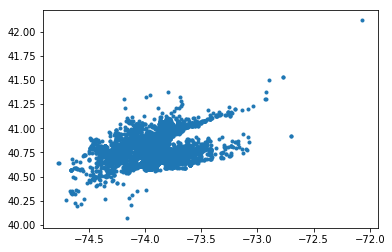

In [71]:
plt.plot(data['Lon'], data['Lat'], '.')

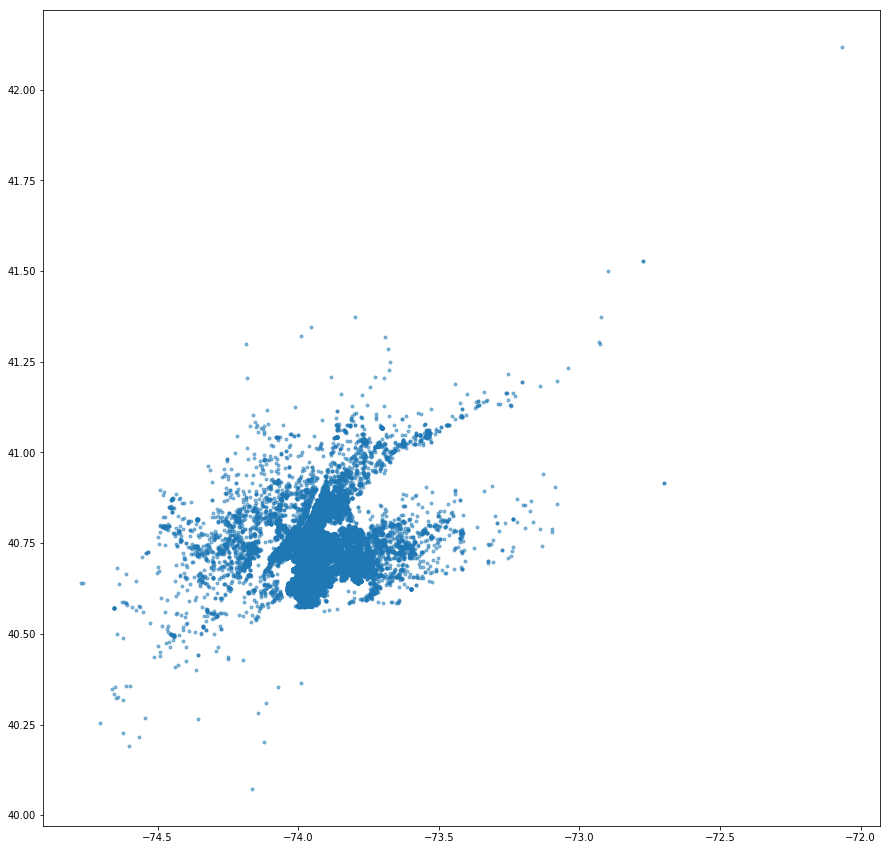

In [78]:
plt.figure(figsize=[15,15])
plt.plot(data['Lon'], data['Lat'], '.', alpha=.5)
#plt.xlin(-74.2, -73.7)
#plt.ylin(40.7,41)